## ANALYTICS LAB TEST SOLUTION
## MARMIK PARASHAR
## PRN NO. 240810125002

# REQUIRED LIBRARIES

In [2]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM


## ANOVA TESTING

## 1. Titanic Dataset - Survival Rate by Passenger Class and Gender
o Objective: Examine survival rates by passenger class and gender, and
test for an interaction effect.
o Hypothesis:
o Null Hypothesis: There is no difference in survival rate based on
passenger class or gender, and no interaction effect.
o Significance Level (α): 0.05.
o Standard Deviation (σ): Calculate the standard deviation of survival
rates across class and gender groups.
o P-value: Calculate the p-value for class, gender, and interaction effects
from the ANOVA output. A p-value < 0.05 for any term indicates a
significant effect.
o Visualization: An interaction plot of survival rates by class and gender.


In [3]:
# Load the Titanic Dataset
path = "C:/Users/marmi/OneDrive/Documents/Titanic.csv"
df = pd.read_csv(path)
print(df.head())

titanic_df = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("Survival rates by Pclass and Sex:\n", titanic_df)
std_dev=titanic_df.std()
print("The Standar Deviation:\n",std_dev)


model = ols('Survived ~ C(Pclass) * C(Sex)', data=df).fit()
anova_results = anova_lm(model)
print("\nANOVA Results:\n", anova_results)


p_value_class = anova_results.loc['C(Pclass)', 'PR(>F)']
p_value_gender = anova_results.loc['C(Sex)', 'PR(>F)']
p_value_interaction = anova_results.loc['C(Pclass):C(Sex)', 'PR(>F)']

print(f"\nP-value for Class: {p_value_class}")
print(f"P-value for Gender: {p_value_gender}")
print(f"P-value for Interaction: {p_value_interaction}")


pivot_table = df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("\nPivot Table of Survival Rates:\n", pivot_table)


# Visualization: Heatmap of survival rates by class and gender
fig = px.imshow(pivot_table, text_auto=True, aspect="auto", 
                title="Heatmap of Survival Rates by Passenger Class and Gender")
fig.show()



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Su

## 3. Educational Dataset - Scores Across Subjects
o Objective: Determine if the mean scores differ between subjects (Math, Science, English).
o Hypothesis:
o Null Hypothesis: There is no difference in mean scores across the subjects.
o Significance Level (α): 0.05.
o Standard Deviation (σ): Calculate the standard deviation of scores for each subject.
o P-value: A p-value < 0.05 from one-way ANOVA suggests significant differences in mean scores across subjects.
o Visualization: Box plot of scores across different subjects. 

In [4]:
np.random.seed(42)
data = {
    'Student': np.repeat(np.arange(1, 21), 3),
    'Test': np.tile(['Maths', 'Science', 'English'], 20),
    'Score': np.random.normal(loc=75, scale=5, size=60) + np.tile([0, 5, 10], 20)
}

df = pd.DataFrame(data)

# Perform the repeated measures ANOVA
rm_anova = AnovaRM(df, 'Score', 'Student', within=['Test']).fit()

print(rm_anova)

# Boxplot to visualize the distribution of scores at each test time point
fig2=px.box(data, x='Test', y='Score', color='Test', title='Change in Test Scores Over Time',template='plotly_dark')
fig2.show()

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Test 16.5278 2.0000 38.0000 0.0000




## Using Z-Test 



## 4. Titanic Dataset - Mean Age of Survivors vs. Population Mean
o Objective: Test if the mean age of survivors differs from 30 years.
o Hypothesis:
o Null Hypothesis: The mean age of survivors is 30 years.
o Significance Level (α): 0.05.
o Standard Deviation (σ): Use the standard deviation of the ages of
survivors.
o P-value: A p-value < 0.05 from the one-sample Z-test indicates a
significant difference from the population mean of 30 years.
o Visualization: Histogram of survivor ages with the population mean
highlighted.


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

Z

C:\Users\marmi\AppData\Local\Temp\ipykernel_6672\606950367.py:28: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



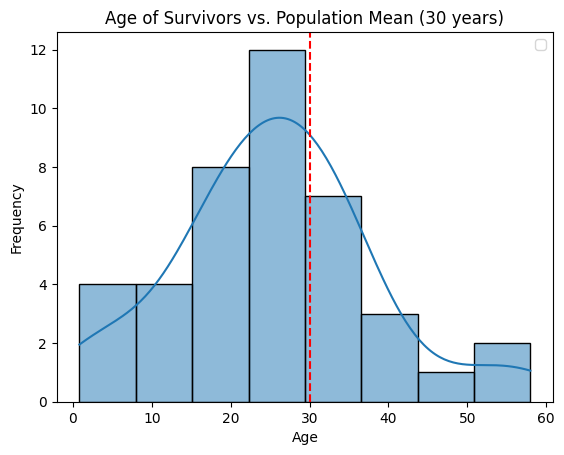

----------------------------------------------------------------------------------------------------
Null Hypothesis: The mean age of survivors is 30 years.
Alternate Hypothesis : The mean age of survivours is not 30 years
----------------------------------------------------------------------------------------------------
CONCLUSION
P_value : 0.025068822294709588 , Alpha : 0.05
There is sufficient evidence to reject the null hypothesis


In [5]:
from statsmodels.stats.weightstats import ztest

# Load the Titanic Dataset
path = "C:/Users/marmi/OneDrive/Documents/Titanic.csv"
data = pd.read_csv(path)
print(data.head())

# Mean age of survivors
survivor_ages = data[data['Survived'] == 1]['Age'].dropna()

# Z_Critical
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)

# Z-test
z_stat, p_value = ztest(survivor_ages, value=30)
print(f"\nZ-test Statistic: {z_stat}, p-value: {p_value}")

# Reject Null
reject_null = abs(z_stat) > z_critical

# Visualization
sns.histplot(survivor_ages, kde=True)
plt.axvline(30, color='red', linestyle='--')
plt.title('Age of Survivors vs. Population Mean (30 years)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conclusion
print("-"*100)

# Defining Hypothesis
print("Null Hypothesis: The mean age of survivors is 30 years.")
print("Alternate Hypothesis : The mean age of survivours is not 30 years")
print("-"*100)
print("CONCLUSION")
if(reject_null):
        print(f"P_value : {p_value} , Alpha : 0.05")
        print("There is sufficient evidence to reject the null hypothesis")
else:
        print(f"P_value : {p_value} , Alpha : 0.05")
        print("There is insufficient evidence to reject the null hypothesis")





## Using T-Test


## 6. Titanic Dataset - Average Fare by Gender
o Objective: Determine if there is a significant difference in fares between
genders.
o Hypothesis:
o Null Hypothesis: There is no difference in average fare between male
and female passengers.
o Significance Level (α): 0.05.
o Standard Deviation (σ): Calculate the standard deviation of fares for
each gender group.
o P-value: A p-value < 0.05 from the two-sample T-test suggests a
significant difference in fares by gender.
o Visualization: Box plot of fares for male and female passengers.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
T-

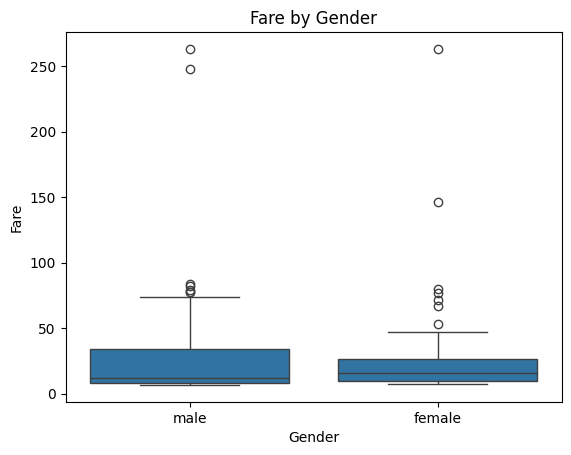

Null Hypothesis: There is no difference in average fare between male and female passengers.
Alternate Hypothesis : There is significant difference in average fare between male and female passengers.
----------------------------------------------------------------------------------------------------
CONCLUSION
P_value : 0.9339523061831486 , Alpha : 0.05
There is insufficient evidence to reject the null hypothesis


In [6]:
# Load the Titanic Dataset
path = "C:/Users/marmi/OneDrive/Documents/Titanic.csv"
data = pd.read_csv(path)
print(data.head())

# Group fares by gender
male_fares = data[data['Sex'] == 'male']['Fare'].dropna()
female_fares = data[data['Sex'] == 'female']['Fare'].dropna()

# Two-sample T-test
t_stat, p_value = stats.ttest_ind(male_fares, female_fares)
print(f"T-test Statistic: {t_stat}, p-value: {p_value}")

# Visualization
sns.boxplot(x='Sex', y='Fare', data=data)
plt.title('Fare by Gender')
plt.xlabel('Gender')
plt.ylabel('Fare')
plt.show()
 
# Defining Hypothesis
print("Null Hypothesis: There is no difference in average fare between male and female passengers.")
print("Alternate Hypothesis : There is significant difference in average fare between male and female passengers.")
print("-"*100)
print("CONCLUSION")
if(p_value<0.05):
        print(f"P_value : {p_value} , Alpha : 0.05")
        print("There is sufficient evidence to reject the null hypothesis")
else:
        print(f"P_value : {p_value} , Alpha : 0.05")
        print("There is insufficient evidence to reject the null hypothesis")



## Monte Carlo Simulation Questions: 



## 11.Question: 
Use Monte Carlo simulation to estimate the mean blood glucose level
for a hypothetical group of patients. Base the simulation on the distribution of
glucose levels in the Diabetes dataset.
• Objective: Use the glucose data to generate a sampling distribution of the
mean blood glucose level.


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Estimated Mean Blood Glucose Level: 120.87966200000001


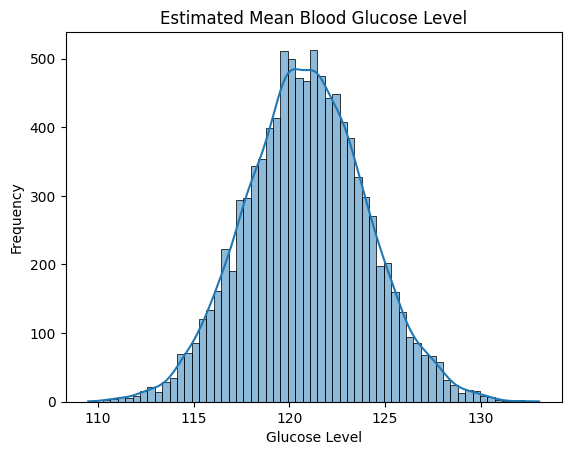

In [7]:
# Load Diabetes dataset
path = "C:/Users/marmi/OneDrive/Documents/Diabetes Dataset.csv"
data = pd.read_csv(path)
print(data.head())

# Glucose levels
glucose_levels = data['Glucose']

# Simulation parameters
n_simulations = 10000
sample_means = []

for _ in range(n_simulations):
    sample = np.random.choice(glucose_levels, size=100, replace=True)
    sample_means.append(sample.mean())

estimated_mean_glucose = np.mean(sample_means)
print(f"Estimated Mean Blood Glucose Level: {estimated_mean_glucose}")


# Plot the results
sns.histplot(sample_means, kde=True)
plt.title('Estimated Mean Blood Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

## 12.Question: 
Use Monte Carlo simulation to estimate the proportion of diabetic
patients with a BMI above a certain threshold (e.g., BMI > 30).
• Objective: Simulate patient BMI data to estimate the proportion of patients
who might have diabetes based on a BMI threshold.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Estimated Proportion of Diabetic Patients with BMI > 30: 0.6051614583333333


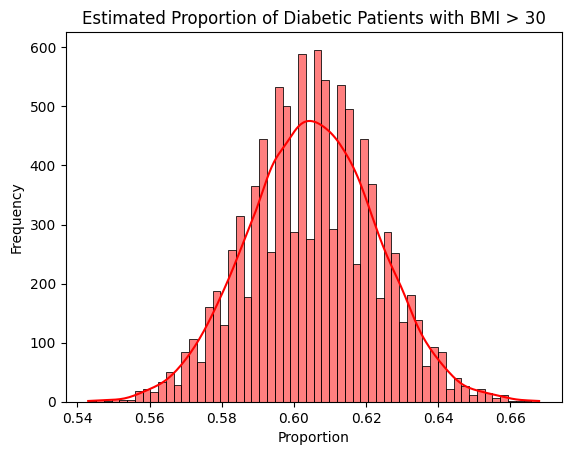

In [8]:
# Load Diabetes dataset
path = "C:/Users/marmi/OneDrive/Documents/Diabetes Dataset.csv"
data = pd.read_csv(path)
print(data.head())

# Simulation parameters
n_simulations = 10000
bmi_threshold = 30
bmi_above_threshold_counts = []

for _ in range(n_simulations):
    sample = data['BMI'].sample(frac=1, replace=True)
    proportion_above_threshold = (sample > bmi_threshold).mean()
    bmi_above_threshold_counts.append(proportion_above_threshold)

estimated_proportion_above_threshold = np.mean(bmi_above_threshold_counts)
print(f"Estimated Proportion of Diabetic Patients with BMI > 30: {estimated_proportion_above_threshold}")

# Visualization
sns.histplot(bmi_above_threshold_counts,color = 'red' ,kde=True)
plt.title('Estimated Proportion of Diabetic Patients with BMI > 30')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()
